In [1]:
from glob import glob
import pandas as pd
import struct
import numpy as np
import struct
import os
from time import time
import matplotlib.pyplot as plt # not needed if you don't want to plot
import pickle
import warnings
import sys
import gzip
import json
plt.rcParams.update({'font.size': 16})
from scipy.interpolate import interp2d
from scripts import *
from material import *
from scipy.stats import norm
starting_dir = os.getcwd()

In [2]:
transmission_curve = pd.read_csv("source_efficiency_5mm_collimator_half_insulator.csv", index_col=0)

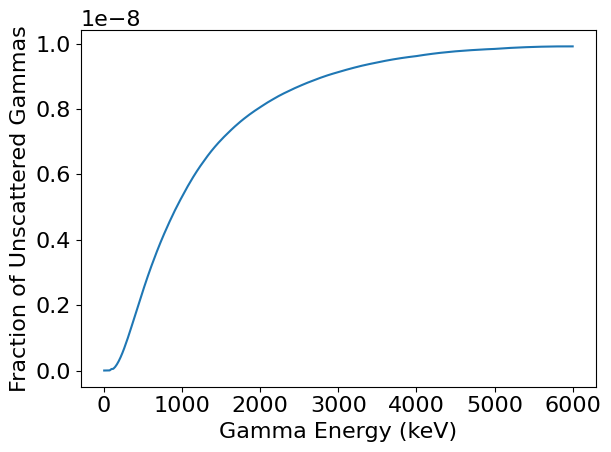

In [3]:
plt.rcParams.update({'font.size': 16})
plt.figure()
plt.plot(transmission_curve["energy(keV)"], transmission_curve["source_efficiency"])
plt.xlabel("Gamma Energy (keV)")
plt.ylabel("Fraction of Unscattered Gammas")
#plt.xlim(0,700)
#plt.ylim(0,0.2)
plt.tight_layout()
#plt.savefig("figures/msr_pipe_transmission_curve.png")
plt.show()


In [4]:
print(f"661 keV: {np.interp(661.656, transmission_curve['energy(keV)'], transmission_curve['source_efficiency'])}")

print(f"106 keV: {np.interp(106.123, transmission_curve['energy(keV)'], transmission_curve['source_efficiency'])}")

661 keV: 3.5549656540758816e-09
106 keV: 4.8693841124839096e-11


In [5]:
###### ZAI_list = [922350, 922380, 942390, 942410, 541350, 551370, 10010, 10030, 20040, 30070, 40100, 50100, 50110, 60120, 60140, 80160, 80170, 290670, 300660, 300670, 300680, 300700, 300720, 310690, 310710, 310720, 320720, 320730, 320740, 320760, 320770, 320780, 330750, 330760, 330770, 330780, 330790, 330810, 340760, 340770, 340780, 340790, 340791, 340800, 340810, 340811, 340820, 340830, 340840, 340850, 340860, 350790, 350810, 350820, 350830, 350840, 350841, 350850, 350860, 350870, 350880, 360800, 360810, 360820, 360830, 360831, 360840, 360850, 360851, 360860, 360870, 360880, 360890, 360900, 360910, 370830, 370840, 370850, 370860, 370870, 370880, 370890, 370900, 370901, 370910, 370920, 370930, 380860, 380870, 380880, 380890, 380900, 380910, 380920, 380930, 380940, 380950, 390880, 390890, 390891, 390900, 390910, 390911, 390920, 390930, 390940, 390950, 390960, 390961, 390970, 400900, 400910, 400920, 400930, 400940, 400950, 400960, 400970, 400980, 400990, 401000, 401010, 401020, 410930, 410931, 410940, 410950, 410951, 410960, 410970, 410980, 410981, 410990, 410991, 411000, 411010, 420940, 420950, 420960, 420970, 420980, 420990, 421000, 421010, 421020, 421030, 421040, 421050, 421060, 430980, 430990, 430991, 431000, 431010, 431020, 431030, 431040, 431050, 431060, 431070, 440990, 441000, 441010, 441020, 441030, 441040, 441050, 441060, 441070, 441080, 441090, 451020, 451021, 451030, 451031, 451040, 451041, 451050, 451051, 451060, 451061, 451070, 451080, 451090, 461040, 461050, 461060, 461070, 461080, 461090, 461100, 461110, 461120, 471090, 471091, 471101, 471110, 471111, 471120, 471130, 471150, 481100, 481110, 481120, 481130, 481131, 481140, 481150, 481151, 481160, 481170, 481171, 481180, 491130, 491150, 491151, 491170, 491171, 491191, 501150, 501160, 501170, 501171, 501180, 501190, 501191, 501200, 501210, 501211, 501220, 501230, 501231, 501240, 501250, 501251, 501260, 501270, 501271, 501280, 501290, 501291, 501300, 501301, 501310, 501311, 501320, 511210, 511220, 511230, 511240, 511250, 511260, 511261, 511270, 511280, 511281, 511290, 511300, 511301, 511310, 511320, 511321, 511330, 521220, 521230, 521231, 521240, 521250, 521251, 521260, 521270, 521271, 521280, 521290, 521291, 521300, 521310, 521311, 521320, 521330, 521331, 521340, 521350, 521360, 531260, 531270, 531280, 531290, 531300, 531301, 531310, 531320, 531321, 531330, 531340, 531341, 531350, 531360, 531361, 531370, 531380, 541280, 541290, 541300, 541310, 541311, 541320, 541330, 541331, 541340, 541351, 541360, 541370, 541380, 541390, 541400, 551320, 551330, 551340, 551341, 551350, 551351, 551360, 551380, 551381, 551390, 551400, 551410, 561320, 561340, 561350, 561360, 561370, 561371, 561380, 561390, 561400, 561410, 561420, 561430, 561440, 561450, 571370, 571380, 571390, 571400, 571410, 571420, 571430, 571440, 571450, 571460, 571461, 581380, 581390, 581400, 581410, 581420, 581430, 581440, 581450, 581460, 581470, 581480, 591410, 591420, 591421, 591430, 591440, 591441, 591450, 591460, 591470, 591480, 591481, 591490, 591510, 601420, 601430, 601440, 601450, 601460, 601470, 601480, 601490, 601500, 601510, 601520, 601530, 611460, 611470, 611480, 611481, 611490, 611510, 611520, 611530, 611540, 621470, 621480, 621490, 621500, 621510, 621520, 621530, 621540, 621550, 621560, 621570, 621580, 631510, 631520, 631530, 631540, 631541, 631550, 631560, 631570, 631580, 631590, 641520, 641540, 641550, 641560, 641570, 641580, 641590, 641600, 651580, 651590, 651600, 651610, 661600, 661610, 661620, 661630, 661640, 661660, 671650, 671660, 671661, 681660, 681670, 681680, 681690, 681700, 691690, 691710, 701720, 902310, 902320, 902340, 912310, 912340, 922320, 922340, 922360, 922370, 922390, 932370, 932380, 932390, 942380, 942400, 942420, 952410]

def rename_ZAI_columns(dataframe):
    '''
    Convert the isotope headers of a dataframe from ZAId integer format into symbol-mass string format.
    '''
    z_map = {'Ac': 89, 'Ag': 47, 'Al': 13, 'Am': 95, 'Ar': 18, 'As': 33, 'At': 85, 'Au': 79, 'B': 5, 'Ba': 56, 'Be': 4,
             'Bh': 107, 'Bi': 83, 'Bk': 97, 'Br': 35, 'C': 6, 'Ca': 20, 'Cd': 48, 'Ce': 58,
             'Cf': 98, 'Cl': 17, 'Cm': 96, 'Co': 27, 'Cr': 24, 'Cs': 55, 'Cu': 29, 'Ds': 110, 'Db': 105, 'Dy': 66, 'Er': 68,
             'Es': 99, 'Eu': 63, 'F': 9, 'Fe': 26, 'Fm': 100, 'Fr': 87, 'Ga': 31, 'Gd':
                 64, 'Ge': 32, 'H': 1, 'He': 2, 'Hf': 72, 'Hg': 80, 'Ho': 67, 'Hs': 108, 'I': 53, 'In': 49, 'Ir': 77,
             'K': 19, 'Kr': 36, 'La': 57, 'Li': 3, 'Lr': 103, 'Lu': 71, 'Md': 101, 'Mg': 12, 'Mn':
                 25, 'Mo': 42, 'Mt': 109, 'N': 7, 'Na': 11, 'Nb': 41, 'Nd': 60, 'Ne': 10, 'Ni': 28, 'No': 102, 'Np': 93,
             'O': 8, 'Os': 76, 'P': 15, 'Pa': 91, 'Pb': 82, 'Pd': 46, 'Pm': 61, 'Po': 84, 'Pr':
                 59, 'Pt': 78, 'Pu': 94, 'Ra': 88, 'Rb': 37, 'Re': 75, 'Rf': 104, 'Rg': 111, 'Rh': 45, 'Rn': 86, 'Ru': 44,
             'S': 16, 'Sb': 51, 'Sc': 21, 'Se': 34, 'Sg': 106, 'Si': 14, 'Sm': 62, 'Sn': 50,
             'Sr': 38, 'Ta': 73, 'Tb': 65, 'Tc': 43, 'Te': 52, 'Th': 90, 'Ti': 22, 'Tl': 81, 'Tm': 69, 'U': 92, 'V': 23,
             'W': 74, 'Xe': 54, 'Y': 39, 'Yb': 70, 'Zn': 30, 'Zr': 40}
    z_map_inv = {v: k for k, v in z_map.items()}
    rename_map = {}

    for column in dataframe.columns:
        raw_label = column
        column = str(column)
        if not column.isnumeric():
            continue
        iso_num = int(column[-1])
        a = int(column[-4:-1])
        z = int(column[:-4])
        renamed = f"{z_map_inv[z]}-{a}"
        if iso_num > 0:
            renamed += "m"
        rename_map[raw_label] = renamed
    renamed_dataframe = dataframe.rename(columns=rename_map)

    return renamed_dataframe

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Extract raw nuclide data


In [6]:
directory = "ian_run"
num_burnup_steps = 26
burnup_vals = [0.0, 0.1, 0.5, 1., 3., 5., 8., 11., 15., 20., 25.,
           30., 35., 40., 45., 50., 60., 70., 80., 90., 
           100., 120., 140., 160., 180., 200.]
concentration_dicts = []
for i in range(num_burnup_steps):
    file_name = f"{directory}/mcfr.inp.bumat{i}"
    concentration_dicts += [extract_from_bumat(file_name, return_list=False)["salt"]]

In [7]:
conc_df = pd.DataFrame(concentration_dicts)
conc_df.index = [str(x) for x in burnup_vals]
conc_df.columns =  [x.replace("<lib>","0") for x in list(conc_df.columns)] 



In [8]:
conc_df.to_csv("msr_concentrations_zai.csv")

In [9]:
rename_ZAI_columns(conc_df).to_csv("msr_concentrations_named.csv")

# run salt decay

with open("pipe_model_template_decay.inp", "r") as f:
    template = f.read()
    
for i in range(num_burnup_steps):
    conc_dict = concentration_dicts[i]
    conc_str = ""
    for isotope in conc_dict.keys():
        conc_str += f"  {isotope}   {conc_dict[isotope]}\n"
    conc_str = conc_str.replace("<lib>", '.02c')
    input_str = template.replace("<concentration>", conc_str)
    file_path = f"{directory}/decay_bustep_{i}.inp"
    with open(file_path, 'w') as f:
        f.write(input_str)
    os.system(f"sss2 {file_path} -omp 4")

# Generate emitted gamma spectra using Serpent
Serpent doesn't natively give you a way of producing gamma spectra. However, by running a zero power neutron transport calculation with the desired decay time, followed by using the decay materials as a gamma source in photon transport mode, a quick binned gamma spectrum can be produced.

In [10]:
def read_single_gspec_individual(file_name):
    gammas = []
    with open(file_name, 'r') as f:
        reading = False
        for line in f:
            if reading and next_empty:
                next_empty = False
            elif (len(line) < 2 and reading) or ("]" in line):
                reading = False
            elif reading:
                line = line.split()
                gamma_data = {
                    "energy": float(line[4])*1000,
                    "intensity": float(line[2])*float(line[5]),
                    "isotope": isotope
                }
                gammas += [gamma_data]
            if "discrete spectrum" in line:
                reading = True
                isotope = line.split(" ")[2]
                next_empty = True
    return pd.DataFrame(gammas)


In [11]:
gspec_df_list = []
for i in range(num_burnup_steps):
    gspec_file_name = f"{directory}/decay_bustep_{i}.inp_gsrc.m"
    gspec_df_list += [read_single_gspec_individual(gspec_file_name)]

In [12]:
example_emission_data = gspec_df_list[20]
burnup_vals[-1]

200.0

In [13]:
def measure_single_gamma(emission_rate, 
                         detector_distance, 
                         detector_diameter,
                         intrinsic_efficiency=0.1, 
                         measurement_time = 20, 
                         print_results = True):
    
    detector_solid_angle = (np.pi*(detector_diameter/2)**2)/((detector_distance)**2)
    detection_efficiency = (detector_solid_angle/(4*np.pi))*intrinsic_efficiency

    average_count_rate = emission_rate*detection_efficiency
    sampled_counts = np.random.poisson(average_count_rate*measurement_time)[0]
    counting_uncertainty = np.sqrt(average_count_rate/measurement_time)/average_count_rate
    
    if print_results:
        print(f"Measured Counts: {sampled_counts} ({round(counting_uncertainty*100,4)}% uncertainty)")
    return sampled_counts, counting_uncertainty


    
    

# Isotopics Plotting

In [14]:
tracked_nuclide_list = []
tracked_isotopes = ["92235<lib>", "94239<lib>", "93239<lib>", "55137<lib>"]
for conc_dict in concentration_dicts:
    step_dict = {}
    for isotope in tracked_isotopes:
        step_dict[isotope] = conc_dict[isotope]
    tracked_nuclide_list += [step_dict]
tracked_nuclide_df = pd.DataFrame(tracked_nuclide_list)

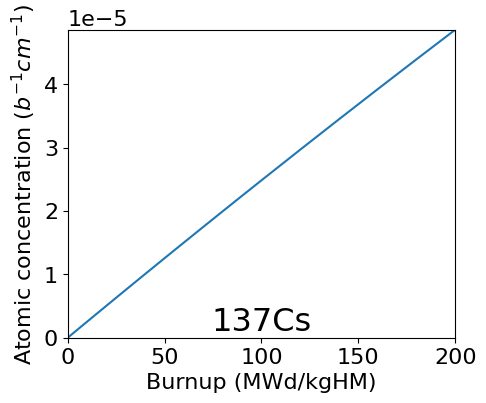

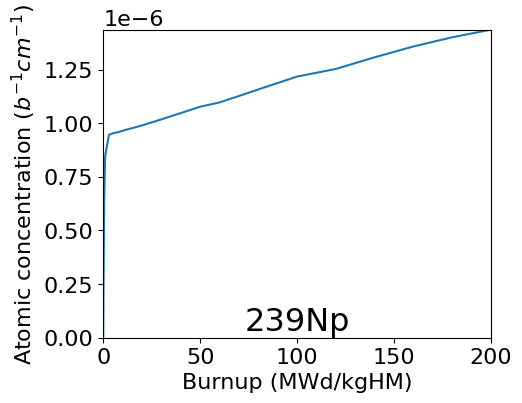

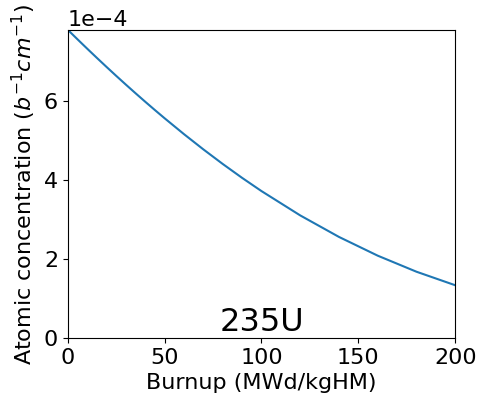

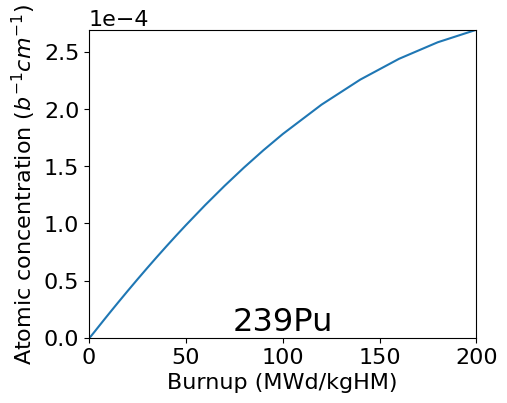

In [15]:
label_ids = {
    "137Cs": "55137<lib>",
    "239Np": "93239<lib>",
    "235U": "92235<lib>",
    "239Pu": "94239<lib>"
}

for nuclide in label_ids.keys():
    plt.figure(figsize=(5,4))
    plt.plot(burnup_vals, tracked_nuclide_df[label_ids[nuclide]])
    plt.xlabel("Burnup (MWd/kgHM)")
    plt.ylabel(r"Atomic concentration ($b^{-1}cm^{-1}$)")
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    max_val = max(tracked_nuclide_df[label_ids[nuclide]])
    plt.ylim(0, max_val )
    plt.xlim(0, 200)
    plt.text(100, max_val*0.05, nuclide, ha="center", va="center", fontsize="x-large")
    plt.show()



# Assessing individual gamma meassurement feasibility 


In [16]:
min_energy = 25
max_energy = 1000
intensity_threshold = 1e8

top_100_gammas = example_emission_data.sort_values(["intensity"], ascending=False)[(min_energy<example_emission_data["energy"])][0:100]

most_visible_gammas = example_emission_data[
    (example_emission_data["energy"]<max_energy) & 
    (min_energy < example_emission_data["energy"]) & 
    (example_emission_data["intensity"] > intensity_threshold)]
most_visible_nuclides = most_visible_gammas["isotope"].unique()
print("Ba-137m" in most_visible_nuclides)

most_visible_actinides = []
for nuclide in most_visible_nuclides:
    nuc_str = nuclide.split("-")
    a_val = int(nuc_str[1].replace("m",""))
    if a_val > 200:
        most_visible_actinides += [nuclide]

display(most_visible_actinides)
display(most_visible_nuclides)
display(top_100_gammas)
print(len(most_visible_nuclides))

True


/tmp/ipykernel_261726/874033331.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_100_gammas = example_emission_data.sort_values(["intensity"], ascending=False)[(min_energy<example_emission_data["energy"])][0:100]


['Np-239',
 'U-239',
 'U-237',
 'Np-238',
 'Np-240',
 'Np-240m',
 'Am-242',
 'Pu-243',
 'Am-244']

array(['Np-239', 'U-239', 'I-134', 'Te-134', 'I-132', 'Nb-101', 'La-144',
       'La-140', 'Cs-138', 'Sr-93', 'Ba-141', 'Mo-101', 'Zr-99', 'Mo-104',
       'Mo-103', 'Ba-142', 'Te-132', 'I-135', 'La-142', 'Nb-102',
       'Xe-139', 'Y-96m', 'Ce-143', 'Ba-143', 'Tc-104', 'Xe-138',
       'Cs-140', 'I-133', 'Rb-91', 'Ce-145', 'Xe-135', 'Te-133m', 'Nb-99',
       'Sr-96', 'Xe-133', 'Sb-132', 'Kr-90', 'Te-133', 'Rb-89', 'Tc-101',
       'Nb-95', 'Zr-95', 'Nb-100', 'Nb-97', 'Kr-89', 'U-237', 'Nb-97m',
       'Tc-99m', 'Xe-140', 'Sr-94', 'Sr-92', 'Cs-141', 'La-145', 'Pr-147',
       'Y-97m', 'I-136m', 'Sb-131', 'Ru-103', 'Kr-91', 'Tc-105', 'Y-94',
       'Ba-140', 'Y-99', 'Sb-130', 'Rb-93', 'Sb-132m', 'I-136', 'Kr-88',
       'Ce-146', 'Sr-91', 'Mo-105', 'Ce-141', 'Ba-145', 'Te-131',
       'Sb-130m', 'Rb-92', 'Y-95', 'I-131', 'Ru-105', 'Sb-133', 'Tc-103',
       'Y-93m', 'Y-98m', 'Zr-100', 'Pr-146', 'Rb-90', 'Sr-95', 'Nb-98',
       'Y-98', 'Sr-97', 'Y-91m', 'Kr-92', 'Tc-106', 'Br-87', 'Br-

,energy,intensity,isotope
0,106.123,1.200911e+15,Np-239
2,103.734,9.852398e+14,Np-239
53,74.664,9.405416e+14,U-239
163,847.025,8.602396e+14,I-134
4,277.599,6.593593e+14,Np-239
...,...,...,...
4129,724.192,1.024089e+14,Zr-95
675,328.762,1.020367e+14,La-140
7860,555.570,1.007872e+14,Y-91m
166,595.362,9.978780e+13,I-134


439


## List gammas from parent nucleus

/tmp/ipykernel_261726/2078443997.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nuclide_data = example_emission_data.sort_values(["intensity"], ascending=False)[example_emission_data["isotope"]==nuclide_to_check][:20]


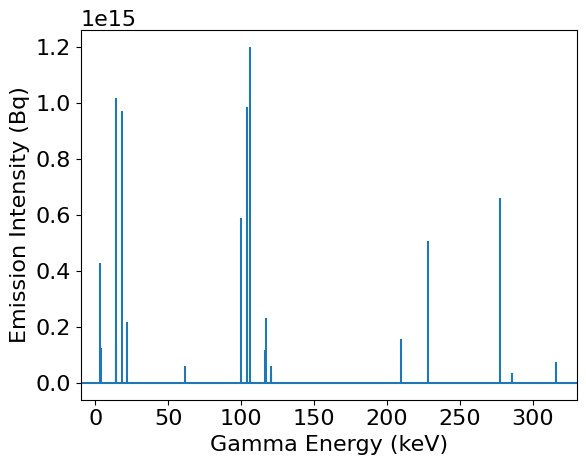

In [17]:
nuclide_to_check = "Np-239"
nuclide_data = example_emission_data.sort_values(["intensity"], ascending=False)[example_emission_data["isotope"]==nuclide_to_check][:20]


plt.figure()
plt.vlines(nuclide_data["energy"], ymin=0, ymax=nuclide_data["intensity"])
plt.plot([-50,350], [0,0])
plt.xlabel("Gamma Energy (keV)")
plt.xlim(-10,330)
plt.ylabel("Emission Intensity (Bq)")
plt.show()

# See gammas visible with a given energy resolution and center

In [23]:
energy_resolution = 5000/106123
order = 1
first_order_energy = 106.123
min_threshold = 1E4
center_energy = first_order_energy*order
energy_width = center_energy*energy_resolution
lower_bound = center_energy - energy_width
upper_bound = center_energy + energy_width
print(f"\nOrder {order}: {round(center_energy, 2)} ({round(lower_bound,2)} - {round(upper_bound,2)})")

filtered_gammas = example_emission_data[
(example_emission_data["energy"]<upper_bound) & 
(lower_bound < example_emission_data["energy"]) &
(min_threshold < example_emission_data["intensity"]) ]

sorted_gammas = filtered_gammas.sort_values(["intensity"], ascending=False)

sorted_gammas["energy_difference"] = np.abs(sorted_gammas["energy"]-center_energy)/center_energy*100

display(sorted_gammas)

print(display(sorted_gammas["energy"].iloc[:5]*1000))



Order 1: 106.12 (101.12 - 111.12)


,energy,intensity,isotope,energy_difference
0,106.123,1.200911e+15,Np-239,1.339093e-14
2,103.734,9.852398e+14,Np-239,2.251161e+00
5415,108.788,7.625376e+13,Kr-91,2.511237e+00
6312,103.519,5.487335e+13,Sb-132m,2.453756e+00
3657,103.519,3.352679e+13,Sb-132,2.453756e+00
...,...,...,...,...
30786,108.481,1.627203e+04,U-235,2.221950e+00
34100,103.734,1.352960e+04,Am-239,2.251161e+00
30607,108.078,1.297553e+04,Th-233,1.842202e+00
30995,108.921,1.181732e+04,Th-231,2.636563e+00


0       106123.0
2       103734.0
5415    108788.0
6312    103519.0
3657    103519.0
Name: energy, dtype: float64

None


In [24]:
target_isotope = nuclide_to_check

min_threshold = 1E2 # 1.171339e+15*0.01

energy_resolution_grid = np.logspace(-4, -1.5, 1000)
pollution_factor_list = []




for energy_resolution in energy_resolution_grid:
    sorted_df_list = []
    order = 1
    center_energy = first_order_energy*order
    energy_width = center_energy*energy_resolution
    lower_bound = center_energy - energy_width
    upper_bound = center_energy + energy_width
    #print(f"\nOrder {order}: {round(center_energy, 2)} ({round(lower_bound,2)} - {round(upper_bound,2)})")
    
    filtered_gammas = example_emission_data[
    (example_emission_data["energy"]<upper_bound) & 
    (lower_bound < example_emission_data["energy"]) &
    (min_threshold < example_emission_data["intensity"]) ]

    sorted_gammas = filtered_gammas.sort_values(["intensity"], ascending=False)

    sorted_gammas["energy_difference"] = np.abs(sorted_gammas["energy"]-center_energy)/center_energy*100
    sorted_df_list += [sorted_gammas]
    merged_df = pd.concat(sorted_df_list)
    target_index = merged_df[ (np.isclose(merged_df["energy"], first_order_energy) ) & 
        (merged_df["isotope"] == target_isotope) ].index
    most_intense_gamma = merged_df["intensity"].loc[target_index]
    leftover_gamma_df = merged_df.drop(index=target_index)
    noise_gammas = leftover_gamma_df["intensity"].sum()
    pollution_factor = noise_gammas/most_intense_gamma
    pollution_factor_list += [pollution_factor]
    

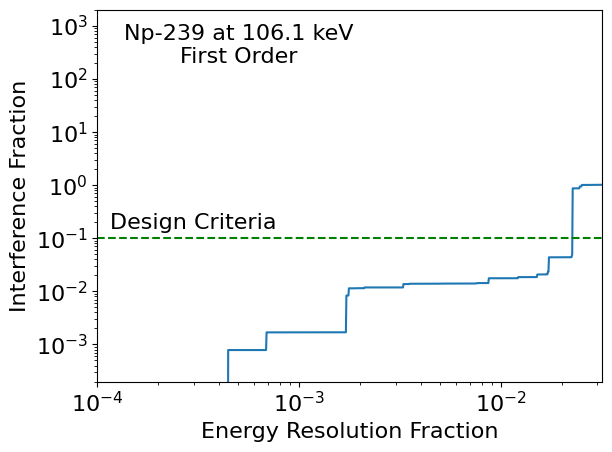

In [25]:
plt.figure()
plt.plot(energy_resolution_grid, pollution_factor_list)
plt.xscale("log")
plt.xlabel("Energy Resolution Fraction")
plt.ylabel("Interference Fraction")
plt.yscale("log")
plt.plot( [energy_resolution_grid[0], energy_resolution_grid[-1]],
        [0.1, 0.1], "g--")
plt.text(3E-4, 1.5E-1, "Design Criteria", ha="center")
plt.ylim(2E-4, 2E3)
plt.xlim(energy_resolution_grid[0], energy_resolution_grid[-1])
label = f"{target_isotope} at {round(first_order_energy,1)} keV"
plt.text(5E-4, 20E1, label+"\nFirst Order", ha="center")
plt.tight_layout()
plt.savefig(f"figures/energy_res_plots/{target_isotope}-{round(first_order_energy,1)}keV_energy_res_1st.png")
plt.show()

In [26]:


pollution_factor_list = []


for energy_resolution in energy_resolution_grid:
    sorted_df_list = []
    for order in range(1, 4+1):
        center_energy = first_order_energy*order
        energy_width = center_energy*energy_resolution
        lower_bound = center_energy - energy_width
        upper_bound = center_energy + energy_width
    
        #print(f"\nOrder {order}: {round(center_energy, 2)} ({round(lower_bound,2)} - {round(upper_bound,2)})")
        
        filtered_gammas = example_emission_data[
        (example_emission_data["energy"]<upper_bound) & 
        (lower_bound < example_emission_data["energy"]) &
        (min_threshold < example_emission_data["intensity"]) ]
    
        sorted_gammas = filtered_gammas.sort_values(["intensity"], ascending=False)
    
        sorted_gammas["energy_difference"] = np.abs(sorted_gammas["energy"]-center_energy)/center_energy*100
        sorted_df_list += [sorted_gammas]
    merged_df = pd.concat(sorted_df_list)
    target_index = merged_df[ (np.isclose(merged_df["energy"], first_order_energy) ) & 
        (merged_df["isotope"] == target_isotope) ].index
    most_intense_gamma = merged_df["intensity"].loc[target_index]
    leftover_gamma_df = merged_df.drop(index=target_index)

    noise_gammas = leftover_gamma_df["intensity"].sum()
    pollution_factor = noise_gammas/most_intense_gamma
    pollution_factor_list += [pollution_factor]
    

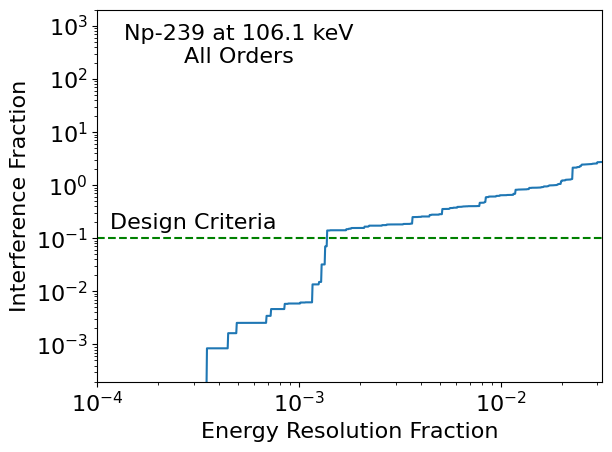

In [27]:
plt.figure()
plt.plot(energy_resolution_grid, pollution_factor_list)
plt.xscale("log")
plt.xlabel("Energy Resolution Fraction")
plt.ylabel("Interference Fraction")
plt.yscale("log")
plt.ylim(2E-4, 2E3)
plt.plot( [energy_resolution_grid[0], energy_resolution_grid[-1]],
        [0.1, 0.1], "g--")
plt.text(3E-4, 1.5E-1, "Design Criteria", ha="center")
plt.xlim(energy_resolution_grid[0], energy_resolution_grid[-1])
label = f"{target_isotope} at {round(first_order_energy,1)} keV"
plt.text(5E-4, 20E1, label+"\nAll Orders", ha="center")
plt.tight_layout()
#plt.savefig(f"figures/energy_res_plots/{target_isotope}-{round(first_order_energy,1)}keV_energy_res_all.png")
plt.show()

# Simulating Counts

In [18]:
count_dict = {}

## Detector settings
Run one at a time

In [19]:
energy_center = 106.123
nuclide = "Np-239"

source_efficiency = 4.869E-11
crystal_efficiency = 2.946E-03 
detector_efficiency = 0.9625

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "energy_filter_curves/np239_111_005fwhm.csv"
details = r"111_0.005fwhm"
crystal_label = r"0.005$\degree$ FWHM"+"\nSi (111)"
fwhm = 1920

plot_max = 1e3
plot_width_modifier = 2
do_hpge_lines = False

# DONE 
# redone

In [25]:
energy_center = 106.123
nuclide = "Np-239"

source_efficiency = 4.869E-11
crystal_efficiency = 8.429E-03
detector_efficiency = 0.9622

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "energy_filter_curves/np239_111_02fwhm.csv"
details = r"111_0.02fwhm"
crystal_label = r"0.02$\degree$ FWHM"+"\nSi (111)"
fwhm = 4350

plot_max = 1e3
plot_width_modifier = 2
do_hpge_lines = False

# DONE 
# redone

In [35]:
energy_center = 106.123
nuclide = "Np-239"

source_efficiency = 4.869E-11
crystal_efficiency = 3.499E-03
detector_efficiency = 0.9622

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "energy_filter_curves/np239_220_005fwhm.csv"
details = r"220_0.005fwhm"
crystal_label = r"0.005$\degree$ FWHM"+"\nSi (220)"
fwhm = 1260

plot_max = 1e3
plot_width_modifier = 2
do_hpge_lines = False

# DONE 
# redone


In [40]:
energy_center = 106.123
nuclide = "Np-239"

source_efficiency = 4.869E-11
crystal_efficiency = 1.161E-02
detector_efficiency = 0.9626

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "energy_filter_curves/np239_220_02fwhm.csv"
details = r"220_0.02fwhm"
crystal_label = r"0.02$\degree$ FWHM"+"\nSi (220)"
fwhm = 2610

plot_max = 1e3
plot_width_modifier = 2
do_hpge_lines = False

# DONE 
# redone

In [45]:
energy_center = 661.6569
nuclide = "Ba-137m"

source_efficiency = 3.555E-09
crystal_efficiency = 8.102E-03
detector_efficiency = 0.3887

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "energy_filter_curves/ba137m_440_002fwhm.csv"
details = r"440_0.002fwhm"
crystal_label = r"0.002$\degree$ FWHM"+"\nSi (440)"
fwhm = 6600

plot_max = 8e3
plot_width_modifier =  0.75
do_hpge_lines = True

# DONE 
# redone

In [50]:
energy_center = 661.6569
nuclide = "Ba-137m"

source_efficiency = 3.555E-09
crystal_efficiency = 1.595E-02
detector_efficiency = 0.3887

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "energy_filter_curves/ba137m_440_010fwhm.csv"
details = r"440_0.01fwhm"
crystal_label = r"0.01$\degree$ FWHM"+"\nSi (440)"
fwhm = 17360

plot_max = 8e3
plot_width_modifier =  0.6
do_hpge_lines = True

# DONE
# redone

In [55]:
energy_center = 661.6569
nuclide = "Ba-137m"

source_efficiency = 3.555E-09
crystal_efficiency = 1.838E-02
detector_efficiency = 0.3886

absolute_efficiency = source_efficiency * detector_efficiency * crystal_efficiency
filter_file = "energy_filter_curves/ba137m_440_020fwhm.csv"
details = r"440_0.02fwhm"
crystal_label = r"0.02$\degree$ FWHM"+"\nSi (440)"
fwhm = 32000

plot_max = 8e3
plot_width_modifier =  0.35
do_hpge_lines = True

# DONE
# redone

## Run these every time

In [56]:
overlap_line = fwhm*0.05/1000

processing_energy_width = fwhm/1000*4*plot_width_modifier
lower_bound = energy_center-processing_energy_width
upper_bound = energy_center+processing_energy_width

plot_width = fwhm/1000*2*plot_width_modifier
lower_plot_bound = energy_center-plot_width
upper_plot_bound = energy_center+plot_width

In [57]:
def read_bandpass_filter(file_name):
    data = pd.read_csv(file_name)
    energy = data[' Energy [eV]']/1000
    counts = data['Number of Rays weighted by $\Vert\mathbf{E_{\sigma}}+\mathbf{E_{\pi}}\Vert^2$']
    energy_step = energy.iloc[1] - energy.iloc[0]
    energy = np.insert(energy, 0, energy[0]-energy_step)
    energy = np.append(energy, energy[-1]+energy_step)
    
    counts = np.insert(counts, 0, 0)
    counts = np.append(counts, 0)

    return pd.DataFrame({"energy":energy, "counts": counts})


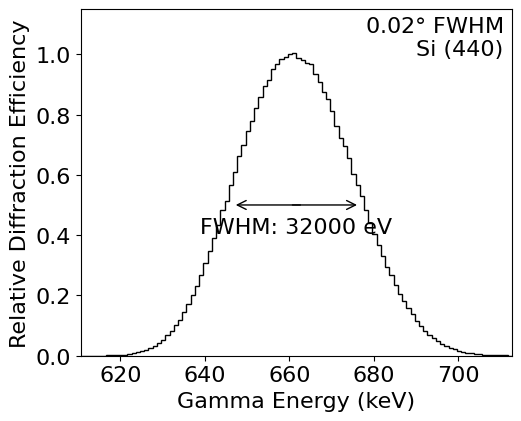

In [58]:
from scipy.interpolate import interp1d



filter_data = read_bandpass_filter(filter_file)




energy=filter_data["energy"]
centroid_index = energy.iloc[(energy-energy_center).abs().argsort()].index[0]

counts = filter_data["counts"]
counts_norm = counts/counts.iloc[centroid_index]

filter_energy = energy
filter_counts = counts_norm

bar_width = (energy[1]-energy[0])

energy_steps = energy - bar_width
energy_steps = energy_steps.tolist()
energy_steps += [energy.iloc[-1]+bar_width]


# Find the x-values where y is approximately half_max_y
# (This step might require more robust search for multiple peaks or noisy data)
indices_above_half_max = np.where(counts_norm >= 0.5)[0]
left_idx = indices_above_half_max[1]
right_idx = indices_above_half_max[-4]


# 5. Calculate FWHM
#fwhm = round(1000*energy.iloc[indices_above_half_max[-1]] - 1000*energy.iloc[indices_above_half_max[0]])




fig, ax = plt.subplots(figsize=(5.5, 4.5) )

# 6. Plot the Data and FWHM

arrow_dict = dict(arrowstyle="->")

#plt.plot([energy.iloc[left_idx], energy.iloc[right_idx]], [0.5, 0.5], linestyle="dotted")
plt.annotate("", (energy.iloc[right_idx], 0.5), (energy_center-overlap_line, 0.5),arrowprops=arrow_dict) 
plt.annotate("", (energy.iloc[left_idx], 0.5), (energy_center+overlap_line, 0.5),arrowprops=arrow_dict) 
#plt.axhline(0.5, color='red', linestyle='--', label='Half Maximum')
#plt.axvline(x_fwhm_left, color='green', linestyle=':', label='FWHM Points')
#plt.axvline(x_fwhm_right, color='green', linestyle=':')
plt.text(0.5, 0.4, f"FWHM: {round(fwhm)} eV", ha="center", va="top", transform = ax.transAxes)
plt.text(0.98, 0.98, f"{crystal_label}", ha="right", va="top", transform = ax.transAxes)
plt.stairs(counts_norm, edges=energy_steps, linewidth=1, linestyle="-", edgecolor="black")
plt.xlabel("Gamma Energy (keV)")
plt.xlim(energy.iloc[0], energy.iloc[-1])
plt.ylim(0,1.15)
plt.ylabel("Relative Diffraction Efficiency")
plt.tight_layout()
plt.savefig(f"figures/filter_plots/{nuclide}_{details}_filter.png")
plt.show()

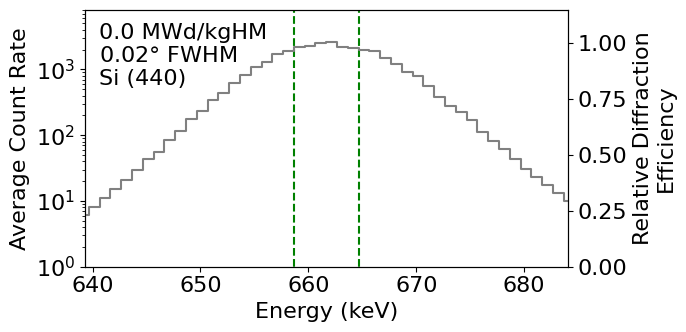

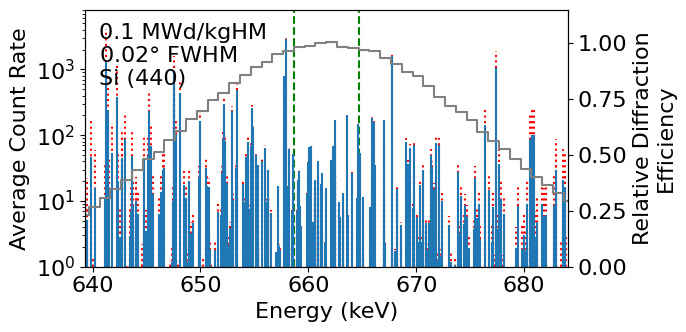

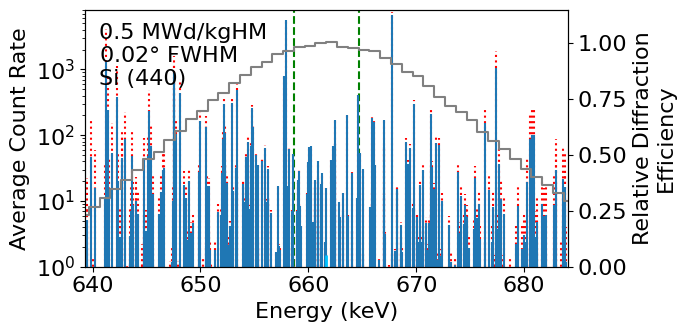

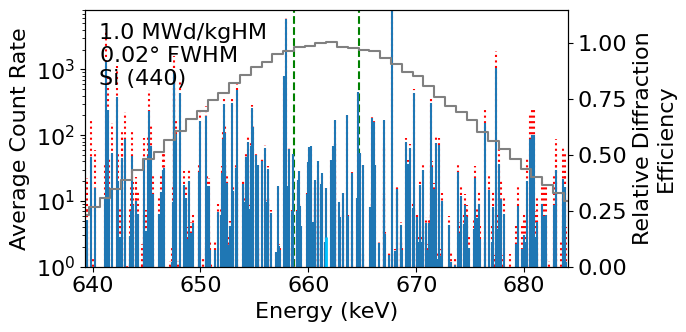

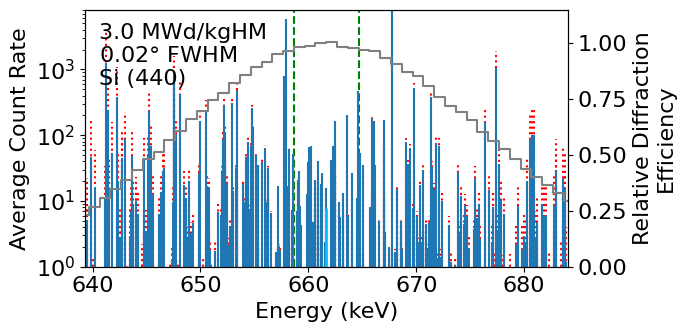

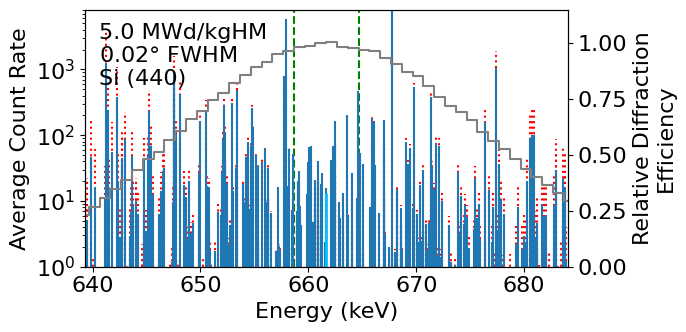

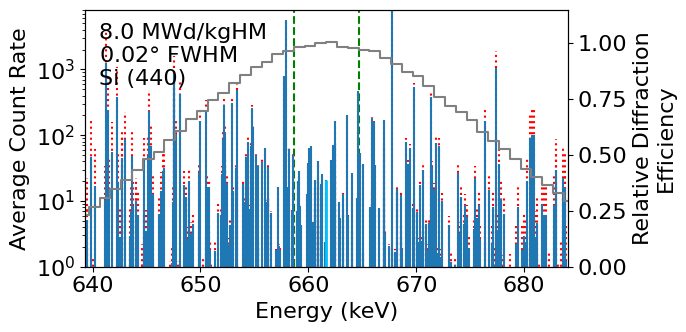

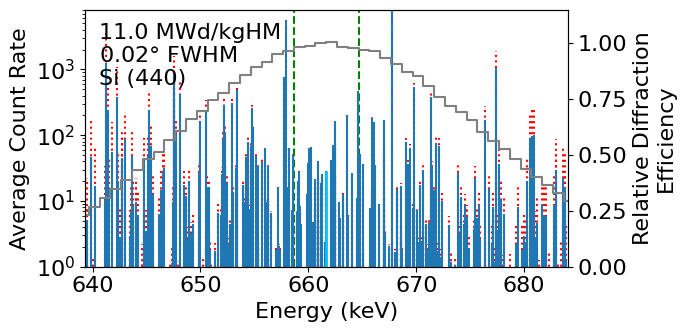

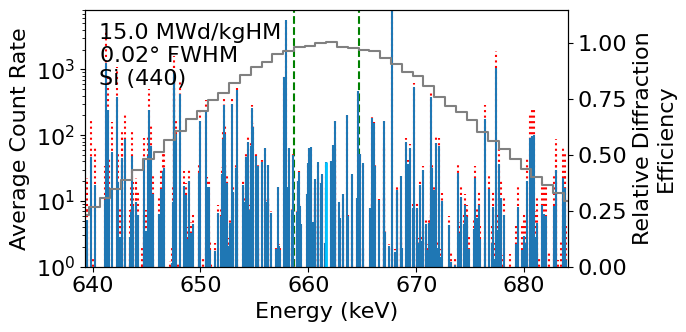

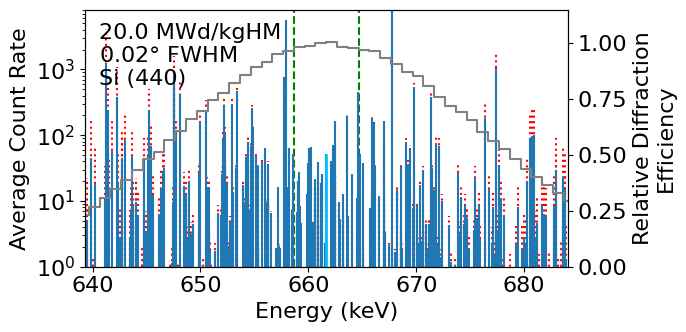

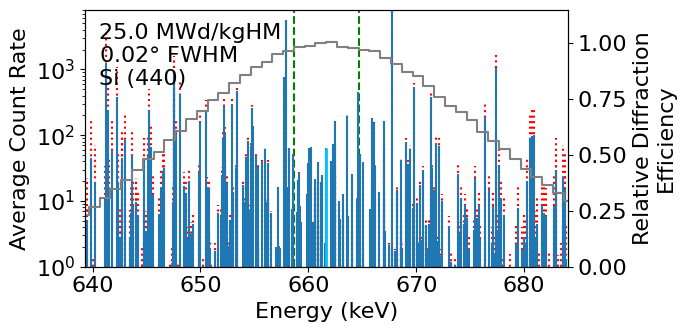

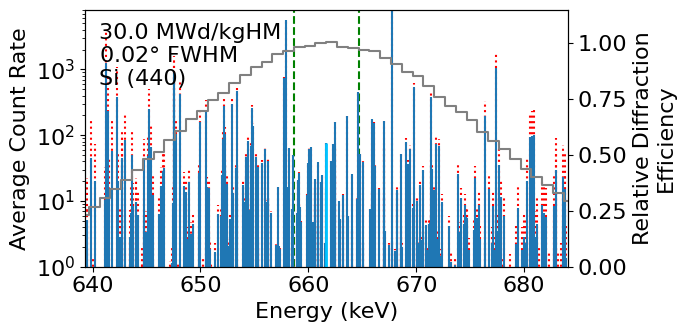

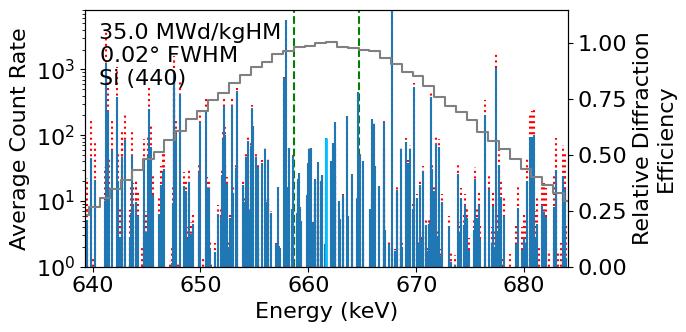

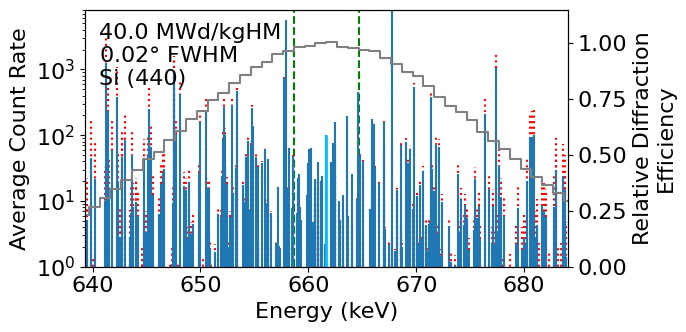

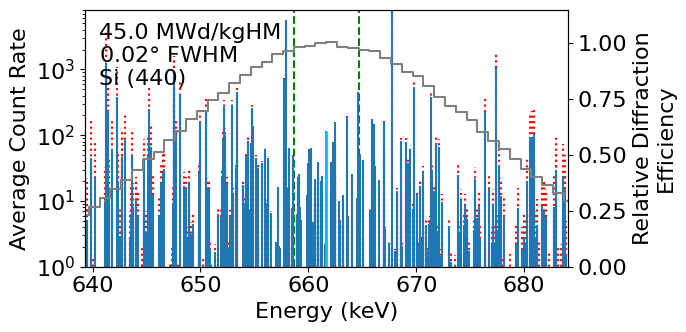

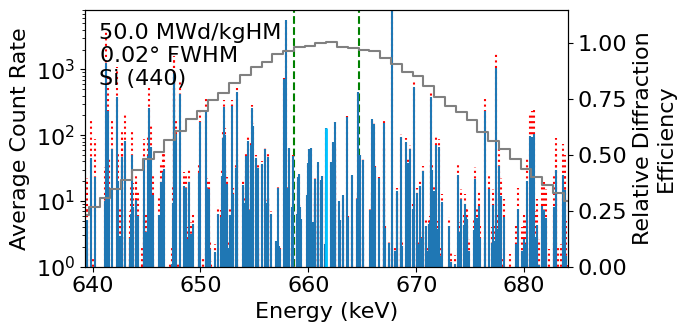

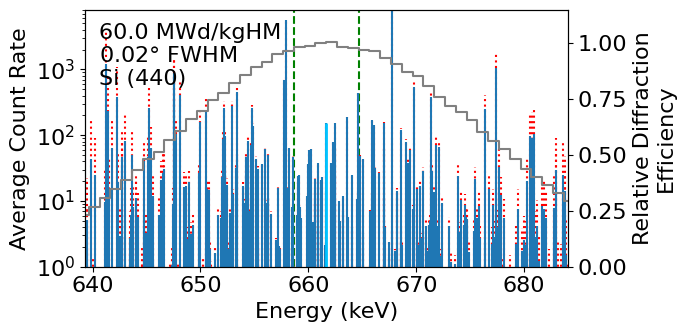

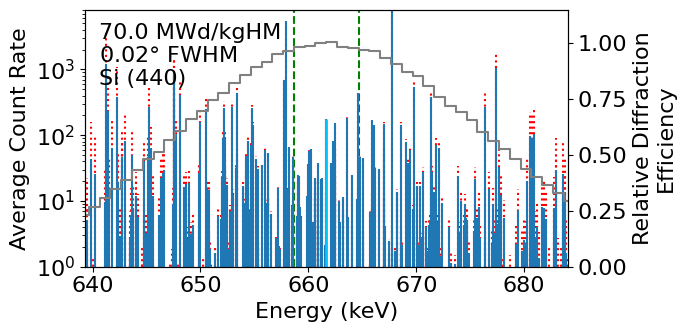

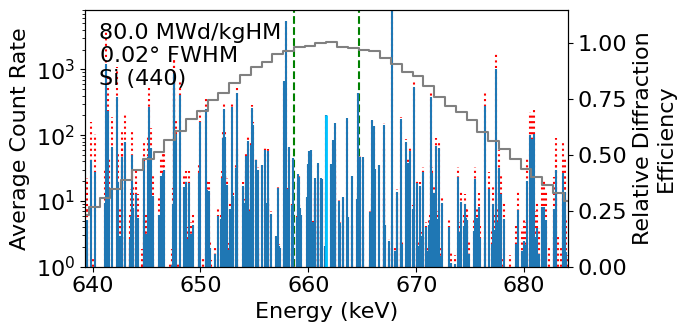

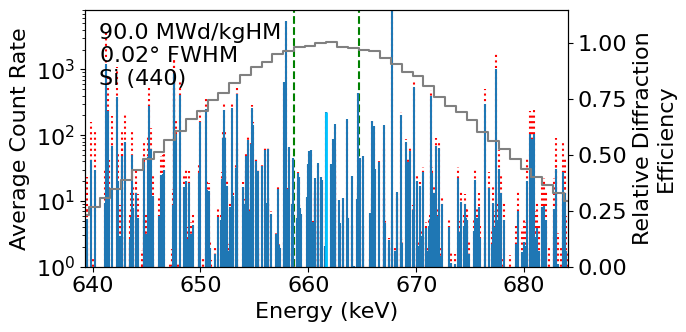

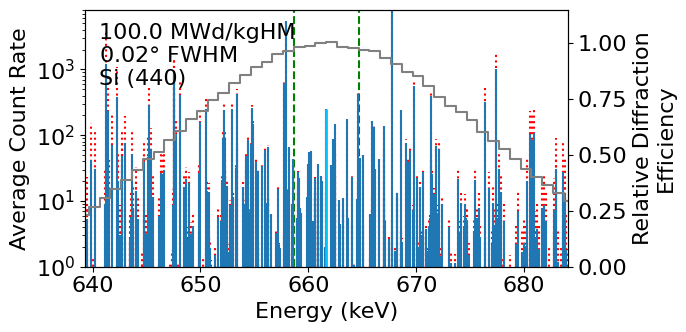

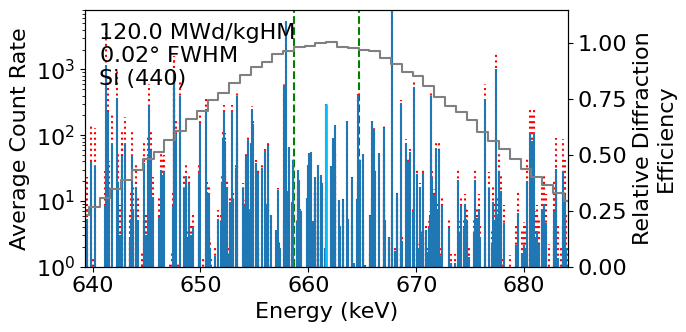

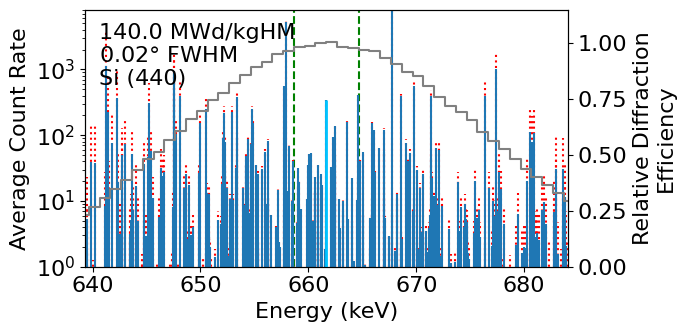

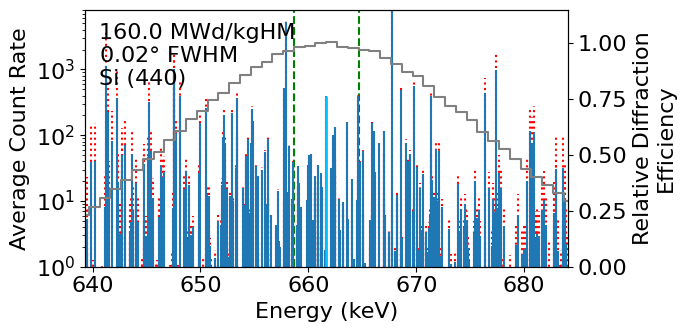

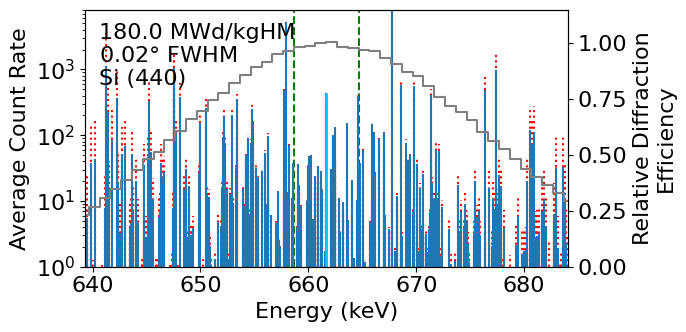

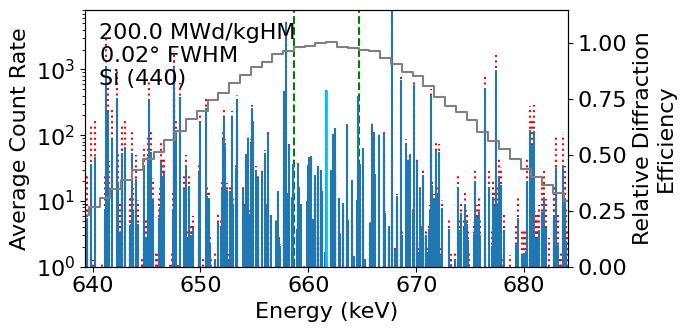

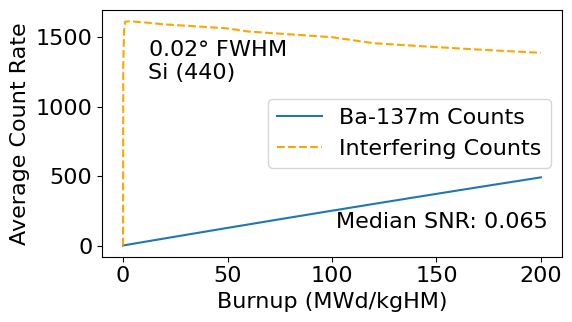

In [59]:
do_legend = False

target_count_list = []
noise_count_list = []
total_count_list = []

hpge_fwhm = 2
hpge_lower = 661.6569 - hpge_fwhm*1.5
hpge_higher = 661.6569 + hpge_fwhm*1.5


for bu_step in range(len(gspec_df_list)):
    gspec_df_filtered = gspec_df_list[bu_step].copy()

    gspec_df_filtered = gspec_df_filtered[ (lower_bound < gspec_df_filtered["energy"]) &  (gspec_df_filtered["energy"] < upper_bound)]
    gspec_df_filtered["efficiency"] = np.interp(gspec_df_filtered["energy"], filter_energy, filter_counts, left=0, right=0)
    gspec_df_filtered = gspec_df_filtered.sort_values("energy")
    gspec_df_filtered["avg_countrate"] = gspec_df_filtered["intensity"]*absolute_efficiency*gspec_df_filtered["efficiency"]
    
    target_index = (gspec_df_filtered["isotope"] == nuclide) & (np.abs(energy_center - gspec_df_filtered["energy"]) < 0.001) 
    target_counts = gspec_df_filtered["avg_countrate"].loc[target_index].sum()
    
    
    if do_hpge_lines:
        noise_index = (~target_index) & (hpge_lower < gspec_df_filtered["energy"]) & (gspec_df_filtered["energy"] < hpge_higher)
        noise_counts = gspec_df_filtered["avg_countrate"].loc[noise_index].sum()
    else:
        noise_counts = gspec_df_filtered["avg_countrate"].loc[~target_index].sum()
    
    target_count_list += [target_counts]
    noise_count_list += [noise_counts]
    total_count_list += [gspec_df_filtered["avg_countrate"].sum()]
    
    abs_weighted = absolute_efficiency*gspec_df_filtered["intensity"]
    filter_weighted = abs_weighted*gspec_df_filtered["efficiency"]
    
    try:
        max_weighted = max(abs_weighted)
    except:
        max_weighted = 0
    fig, ax1 = plt.subplots(figsize=(7,3.6) )
    ln1 = ax1.vlines(gspec_df_filtered["energy"], 1e-11, abs_weighted, linestyle="dotted", color="red", label="Emitted")
    ln2 = ax1.vlines(gspec_df_filtered["energy"], 0, filter_weighted, label="Measured")
    
    
    ax1.vlines(energy_center, 0, target_counts, color="#00c3ff", linewidth=2, zorder=10)
    
    if do_hpge_lines:
        ln4 = ax1.vlines([hpge_lower, hpge_higher], 0, plot_max, linestyle="dashed", color="green", label=r"1.5$\times$"+"HPGe\nFWHM", zorder=-1)
    
    ax1.set_xlim(lower_plot_bound, upper_plot_bound)
    ax1.set_ylim(1, plot_max)
    ax1.set_xlabel("Energy (keV)")
    ax1.set_ylabel("Average Count Rate")
    ax1.set_yscale("log")
    
    ax2 = ax1.twinx() 
    ln3 = ax2.plot(filter_energy, filter_counts, color="gray", label="Filter")
    ax2.set_ylabel("Relative Diffraction\nEfficiency")
    ax2.set_ylim(0,1.15)
    
    if do_hpge_lines:
        lns = [ln1, ln2, ln4]
    else:
        lns = [ln1, ln2]
    labs = [l.get_label() for l in lns]
    lns += [ln3[0]]
    labs += [ln3[0].get_label()]
    
    
    plt.tight_layout()
    bu_str = f"{burnup_vals[bu_step]} MWd/kgHM"+"\n"+crystal_label
    plt.text(0.03, 0.95, bu_str, ha='left', verticalalignment='top', transform = ax1.transAxes)
    if do_legend:
        ax1.legend(lns, labs, loc="upper right")
        plt.savefig(f"figures/filtered_spectra_plots/filtered_spectrum_{details}_bu{bu_step}_legend.png")
    else:
        plt.savefig(f"figures/filtered_spectra_plots/filtered_spectrum_{details}_bu{bu_step}.png")
    plt.show()

count_dict_key = str(round(energy_center)) + "keV_"+details
count_dict[count_dict_key] = {}
count_dict[count_dict_key]["target"] = np.array(target_count_list)
count_dict[count_dict_key]["total"] = np.array(total_count_list)
count_dict[count_dict_key]["noise"] = np.array(noise_count_list)

signal_to_noise_ratios = np.array(target_count_list)[1:]/np.array(noise_count_list)[1:]
median_ratio = np.median(signal_to_noise_ratios)

if median_ratio > 1:
    median_ratio = round(median_ratio,1)
else:
    median_ratio = round(median_ratio,3)

fig, ax = plt.subplots(figsize=(6,3.5) )
plt.plot(burnup_vals, target_count_list, label=f"{nuclide} Counts")
plt.plot(burnup_vals, noise_count_list, color="orange", linestyle="dashed", label="Interfering Counts")
crystal_str = f"{crystal_label}"
if do_hpge_lines:
    plt.text(0.1, 0.88, crystal_str, ha='left', verticalalignment='top', transform = ax.transAxes)
else:
    plt.text(0.03, 0.95, crystal_str, ha='left', verticalalignment='top', transform = ax.transAxes)
    

median_str = f"Median SNR: {median_ratio}"
plt.text(0.97, 0.10, median_str, ha='right', verticalalignment='bottom', transform = ax.transAxes)

plt.xlabel("Burnup (MWd/kgHM)")
plt.ylabel("Average Count Rate")
plt.legend()
plt.tight_layout()
plt.savefig(f"figures/signal_vs_noise/{details}_SNR.png")
plt.show()

In [60]:
for key_1 in count_dict.keys():
    for key_2 in count_dict[key_1].keys():
        try:
            count_dict[key_1][key_2] = count_dict[key_1][key_2].tolist()
        except:
            pass

with open("final_count_results.json","w") as f:
    json.dump(count_dict,f)

# Looking at count dict results

In [25]:

with open("final_count_results.json","r") as f:
    count_dict = json.load(f)

In [ ]:
burnup_vals[20]

In [61]:
print(count_dict.keys())

dict_keys(['106keV_111_0.005fwhm', '106keV_111_0.02fwhm', '106keV_220_0.005fwhm', '106keV_220_0.02fwhm', '662keV_440_0.002fwhm', '662keV_440_0.01fwhm', '662keV_440_0.02fwhm'])


In [62]:
np239_counts = ['106keV_111_0.005fwhm', '106keV_111_0.02fwhm', 
                '106keV_220_0.005fwhm', '106keV_220_0.02fwhm' ]

cs137_counts = ['662keV_440_0.002fwhm', '662keV_440_0.01fwhm', '662keV_440_0.02fwhm']


for key in np239_counts + cs137_counts:
    subdata = count_dict[key]
    target_counts = np.array(subdata['target'])
    total_counts = np.array(subdata['total'])
    noise_counts = np.array(subdata['noise'])
    median_target_counts = round(np.median(target_counts), 1)
    median_noise_counts = round(np.median(noise_counts), 1)
    median_total_counts = round(np.median(total_counts), 1)
    SNR = target_counts/noise_counts
    SNR = np.nan_to_num(SNR)
    median_SNR = round(np.median(SNR), 3)
    print(f"{key} (Medians) target: {median_target_counts} total: {median_total_counts} noise: {median_noise_counts} SNR {median_SNR}")
    

106keV_111_0.005fwhm (Medians) target: 141.7 total: 147.3 noise: 5.6 SNR 25.273
106keV_111_0.02fwhm (Medians) target: 400.4 total: 611.9 noise: 211.5 SNR 1.893
106keV_220_0.005fwhm (Medians) target: 168.2 total: 172.0 noise: 3.8 SNR 44.329
106keV_220_0.02fwhm (Medians) target: 557.8 total: 648.7 noise: 91.0 SNR 6.131
662keV_440_0.002fwhm (Medians) target: 40.5 total: 2300.2 noise: 570.1 SNR 0.071
662keV_440_0.01fwhm (Medians) target: 82.3 total: 20010.1 noise: 1339.7 SNR 0.061
662keV_440_0.02fwhm (Medians) target: 95.4 total: 34800.2 noise: 1560.3 SNR 0.061


/tmp/ipykernel_261726/2625440002.py:15: RuntimeWarning: invalid value encountered in divide
  SNR = target_counts/noise_counts


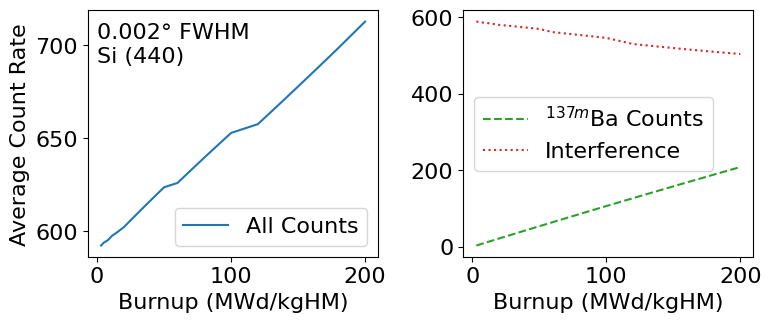

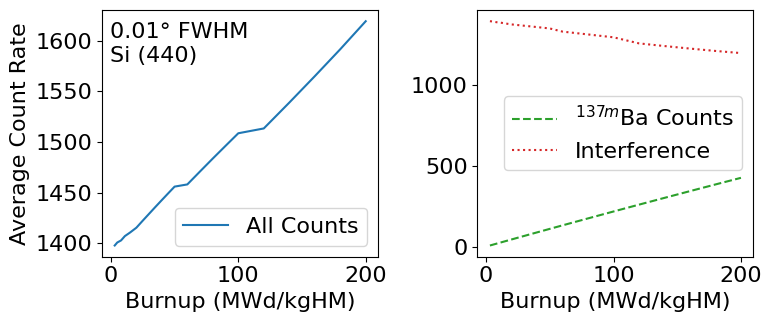

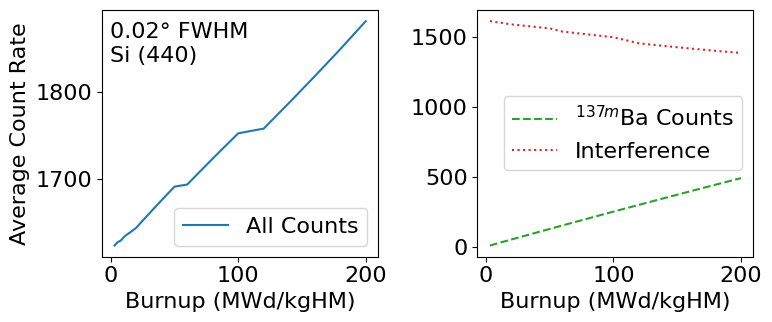

In [22]:
nuclide = r"$^{137m}$Ba"
#nuclide = r"$^{239}$Np"

for key in cs137_counts:
    split_key = key.split("_")
    ori = split_key[1]
    misorientation = split_key[2].replace("fwhm","")
    subdata = count_dict[key]
    target_counts = np.array(subdata['target'])
    noise_counts = np.array(subdata['noise'])
    total_counts = target_counts+noise_counts

    fig, ax = plt.subplots(ncols=2, figsize=(8,3.5) )
    crystal_str = f"{misorientation}° FWHM\nSi ({ori})"
    ax[0].text(0.03, 0.95, crystal_str, ha='left', verticalalignment='top', transform = ax[0].transAxes)
        
    ax[0].plot(burnup_vals[4:], total_counts[4:], color="tab:blue", label="All Counts")
    ax[0].set_xlabel("Burnup (MWd/kgHM)")
    ax[0].set_ylabel("Average Count Rate")
    ax[0].legend()

    #plt.text(0.03, 0.95, crystal_str, ha='left', verticalalignment='top', transform = ax.transAxes)
    ax[1].plot(burnup_vals[4:], target_counts[4:], color="tab:green", linestyle="dashed", label=f"{nuclide} Counts")
    ax[1].plot(burnup_vals[4:], noise_counts[4:], color="tab:red", linestyle="dotted", label="Interference")
    ax[1].legend()
    ax[1].set_xlabel("Burnup (MWd/kgHM)")
    plt.tight_layout()
    plt.savefig(f"figures/count_rate_vs_burnup/{key}_counts.png")
    plt.show()

## Adjust parameters to see if you can get a clear mesaurement

In [27]:
energy = 106.123
distance = 2.0

slit_width = 0.1 / 1000 
diffraction_order = 1
crystal_plane = 3


_,_,_,_,_,close = filter_gammas_gcd(example_emission_data, energy, distance,
                 diffraction_efficiency = assumed_diffraction_efficiency,
                  interplanar_crystal_spacing=spacing_options[crystal_plane-1],
                 desired_order=diffraction_order, slit_width=slit_width)

Measured Counts: 5948 (1.3099% uncertainty)
Nearby Counts: 8646
Energy Resolution: [0.0292, 0.0584, 0.0876, 0.1168] keV
Energies: [106.12299999999999, 212.24599999999998, 318.36899999999997, 424.49199999999996]
Fraction of interference: 0.0689%
Bragg angle: 5.236892 degrees
Main Isotope: Np-239

        energy     intensity isotope
0      106.123  5.824434e+03  Np-239
26346  106.113  3.318102e-04  Tb-161
30816  106.125  1.468959e-07  Cm-243

       energy  intensity isotope
26755  212.20   0.007197  Tb-163
27574  212.30   0.000003   U-240
30386  212.29   0.000001  Np-237

       energy     intensity isotope
4384    318.3  3.267192e+00   Kr-89
34238   318.4  5.503613e-12   Zn-69

       energy  intensity isotope
16267  424.50   0.445946  Ba-147
14542  424.55   0.182787  Pm-151
19337  424.40   0.110296  In-127

Efficiency: [4.972458647650649e-12, 2.4531126909637813e-11, 3.192886401274553e-11, 1.2814780004276056e-11]


In [42]:
energy = 661.657
distance = 4

slit_width = 0.1 / 1000 
diffraction_order = 1
crystal_plane = 4


_,_,_,_,_,close = filter_gammas_gcd(example_emission_data, energy, distance,
                 diffraction_efficiency = assumed_diffraction_efficiency,
                  interplanar_crystal_spacing=spacing_options[crystal_plane-1],
                 desired_order=diffraction_order, slit_width=slit_width)

Measured Counts: 1387 (2.7009% uncertainty)
Nearby Counts: 8724
Energy Resolution: [0.4238, 0.8476, 1.2714, 1.6952] keV
Energies: [661.6570000000002, 1323.3140000000003, 1984.971, 2646.6280000000006]
Fraction of interference: 59.8216%
Bragg angle: 1.118437 degrees
Main Isotope: Y-95

        energy   intensity  isotope
16449  661.657  550.778060  Ba-137m
6065   661.640   32.468019    Rb-93
16552  661.580    5.000401    Sr-99

      energy   intensity isotope
7048  1324.0  337.386454    Y-95
993   1323.8  201.450032  Ba-141
1728  1323.2   53.546544  La-142

        energy  intensity isotope
7821   1984.00  33.815707   Sr-97
14349  1985.93  26.690815  La-148
2944   1986.20  18.322260  Tc-104

       energy  intensity isotope
4209  2645.26   9.439012   Kr-89
6102  2646.60   3.158139   Rb-93
1800  2645.70   2.961567  La-142

Efficiency: [6.207823925217518e-11, 4.9904707082574164e-11, 3.65368348928898e-11, 9.661114771910758e-12]


# Selected designs

In [28]:
spacing_options = [1.920E-10, 0.960E-10, 0.640E-10, 0.480E-10]
assumed_diffraction_efficiency = 0.02
example_emission_data = gspec_df_list[19]

In [29]:
np.rad2deg(get_bragg_angle(330.8284499999999, 1, spacing_options[2]))

1.67778970496756

In [30]:
example_emission_data[example_emission_data["isotope"]=="Ba-137m"]

,energy,intensity,isotope
16449,661.657,8.872321e+12,Ba-137m
16450,32.194,3.788491e+11,Ba-137m
16451,31.817,2.076774e+11,Ba-137m
16452,4.470,9.533057e+10,Ba-137m
16453,36.378,7.001001e+10,Ba-137m
16454,36.304,3.626243e+10,Ba-137m
16455,37.255,2.214685e+10,Ba-137m


In [31]:
energy = 661.6569
distance = 3.5

slit_width = 0.2 / 1000 
diffraction_order = 3
intrinsic_efficiency = 0.8
crystal_plane = 3


_,_,_,_,_,close = filter_gammas_gcd(example_emission_data, energy, distance,
                 diffraction_efficiency = assumed_diffraction_efficiency,
                  interplanar_crystal_spacing=spacing_options[crystal_plane-1],
                 desired_order=diffraction_order, slit_width=slit_width,
                    intrinsic_efficiency=intrinsic_efficiency)

Measured Counts: 2898 (1.833% uncertainty)
Nearby Counts: 21634
Energy Resolution: [0.1436, 0.2872, 0.4309, 0.5745] keV
Energies: [220.55229999999995, 441.1045999999999, 661.6568999999998, 882.2091999999998]
Fraction of interference: 48.9997%
Bragg angle: 2.517135 degrees
Main Isotope: Nb-101

        energy   intensity isotope
1591   220.502  187.053126   I-135
14053  220.640   26.086377  Ru-109
14092  220.600    6.401378  Ru-109

      energy    intensity isotope
467    441.1  1517.919722  Nb-101
4493   440.9   151.427383  Nb-100
4628   441.2    67.604548  Xe-140

        energy   intensity  isotope
16449  661.657  560.936466  Ba-137m
3665   661.230   52.201483    Kr-90
6065   661.640   33.066851    Rb-93

       energy   intensity  isotope
6247   881.90  179.300698  Sb-132m
3285   882.70  105.114693  Te-133m
10221  882.13    4.586261    I-137

Efficiency: [3.2576293086502656e-11, 6.146088665241995e-11, 6.322318670033339e-11, 1.8792132116577892e-11]


In [32]:
energy = 106.12300	
distance = 1.5

slit_width = 1 / 1000 
diffraction_order = 3
crystal_plane = 3


_,_,_,_,_,close = filter_gammas_gcd(example_emission_data, energy, distance,
                 diffraction_efficiency = assumed_diffraction_efficiency,
                  interplanar_crystal_spacing=spacing_options[crystal_plane-1],
                 desired_order=diffraction_order, slit_width=slit_width)

Measured Counts: 37969 (0.5143% uncertainty)
Nearby Counts: 51692
Energy Resolution: [0.0448, 0.0895, 0.1343, 0.1791] keV
Energies: [35.37433333333333, 70.74866666666667, 106.123, 141.49733333333333]
Fraction of interference: 0.2002%
Bragg angle: 15.89179 degrees
Main Isotope: Np-239

       energy  intensity isotope
15308   35.34   0.963485  Rh-109

       energy  intensity isotope
12722   70.71   4.514530  Tc-107
10797   70.80   0.188652   Sr-98
17272   70.78   0.069789  Nd-154

       energy     intensity isotope
0     106.123  37726.076209  Np-239
3659  106.050     35.871390   Kr-90
6609  106.170     30.569390  Ce-146

        energy     intensity isotope
17940  141.411  3.482823e+00  Sm-155
29338  141.500  2.677319e-04  Ho-170
28323  141.657  3.894915e-08  Pu-239

Efficiency: [4.256453844602244e-12, 7.952133265577166e-12, 3.2207653013910774e-11, 4.856560962272267e-11]


In [33]:
energy = 74.66400
distance = 1.0

slit_width = 1 / 1000 
diffraction_order = 4
crystal_plane = 2


_,_,_,_,_,close = filter_gammas_gcd(example_emission_data, energy, distance,
                 diffraction_efficiency = assumed_diffraction_efficiency,
                  interplanar_crystal_spacing=spacing_options[crystal_plane-1],
                 desired_order=diffraction_order, slit_width=slit_width)

Measured Counts: 3104 (1.7871% uncertainty)
Nearby Counts: 3383
Energy Resolution: [0.0288, 0.0575, 0.0863, 0.115] keV
Energies: [18.666, 37.332, 55.99799999999999, 74.664]
Fraction of interference: 12.2238%
Bragg angle: 20.239789 degrees
Main Isotope: U-239

        energy     intensity  isotope
31666  18.6806  1.204243e-06  Am-242m
42206  18.6519  1.762041e-14   Ra-225
40729  18.6374  2.095291e-15   Pa-229

       energy   intensity isotope
5113   37.361  347.621602  Pr-147
11739  37.361   29.936571  Pr-149
15883  37.361    2.357671  Pr-151

       energy     intensity isotope
39631    56.0  4.421090e-15  Th-227

        energy    intensity isotope
53     74.6640  2748.396503   U-239
9931   74.6600     2.352443  Nd-149
26334  74.5667     0.026079  Tb-161

Efficiency: [4.569604506812416e-12, 4.997045133998977e-12, 5.597023042823083e-12, 2.996085660792229e-12]


# Plot Serpent Response

In [19]:

def read_pulse_height(file_name, skip_lines=23, number_bins_to_read = 1):
    values = []
    unc_values = []
    with open(file_name, 'r') as f:
        counter = 0
        start_line = skip_lines + 1
        end_line = skip_lines + number_bins_to_read + 2
        for line in f:
            counter += 1
            split_line = line.split()
            if counter > start_line and counter < end_line:
                values += [float(split_line[10])]
                unc_values += [float(split_line[11].replace("\n",""))]
            if counter > end_line:
                break
        print(f"{file_name} {values}")
    return values, unc_values
                
read_pulse_height("cs137_setup/diffraction_0.serpent_det0.m")


cs137_setup/diffraction_0.serpent_det0.m [2.179e-07]


([2.179e-07], [0.01486])

In [115]:
diffraction_efficiencies = [0.02, 0.012, 0.008, 0.002]
detector_setup_data = {
    "137Cs":{
        "directory":"cs137_setup",
        "energy_centers":[220.55229999999995, 441.1045999999999, 661.6568999999998, 882.2091999999998],
        "energy_widths":[0.1436, 0.2872, 0.4309, 0.5745],
        "source_angle":[1.763, 3.000]
    },
    "239Np":{
        "directory":"np239_setup",
        "energy_centers":[35.37433333333333, 70.74866666666667, 106.123, 141.49733333333333],
        "energy_widths":[0.0448, 0.0895, 0.1343, 0.1791],
        "source_angle":[3.615, 5.0]
    },
    "239U":{
        "directory":"u239_setup",
        "energy_centers":[18.666, 37.332, 55.99799999999999, 74.664],
        "energy_widths":[0.0288, 0.0575, 0.0863, 0.115],
        "source_angle":[4.901, 7.000]
    }

}

for label in detector_setup_data.keys():
    efficiency_values = []
    for i in range(4):
        values, unc = read_pulse_height(f"{detector_setup_data[label]['directory']}/diffraction_{i}.serpent_det0.m")
        solid_angle_fraction = 2*np.pi*(1-np.cos( np.deg2rad(detector_setup_data[label]['source_angle'][0]))) / (4*np.pi) 
        efficiency_values += [sum(values)*solid_angle_fraction*diffraction_efficiencies[i]* 6/5 ]
    detector_setup_data[label]["efficiency"] = efficiency_values
display(detector_setup_data)

cs137_setup/diffraction_0.serpent_det0.m [2.179e-07]
cs137_setup/diffraction_1.serpent_det0.m [1.2541e-06]
cs137_setup/diffraction_2.serpent_det0.m [2.45115e-06]
cs137_setup/diffraction_3.serpent_det0.m [3.5112e-06]
np239_setup/diffraction_0.serpent_det0.m [0.0]
np239_setup/diffraction_1.serpent_det0.m [1.55e-09]
np239_setup/diffraction_2.serpent_det0.m [3.066e-07]
np239_setup/diffraction_3.serpent_det0.m [5.227e-07]
u239_setup/diffraction_0.serpent_det0.m [0.0]
u239_setup/diffraction_1.serpent_det0.m [0.0]
u239_setup/diffraction_2.serpent_det0.m [0.0]
u239_setup/diffraction_3.serpent_det0.m [3.8e-09]


{'137Cs': {'directory': 'cs137_setup',
  'energy_centers': [220.55229999999995,
   441.1045999999999,
   661.6568999999998,
   882.2091999999998],
  'energy_widths': [0.1436, 0.2872, 0.4309, 0.5745],
  'source_angle': [1.763, 3.0],
  'efficiency': [1.237751821777311e-12,
   4.274248443389424e-12,
   5.5693719650288305e-12,
   1.994490223324688e-12]},
 '239Np': {'directory': 'np239_setup',
  'energy_centers': [35.37433333333333,
   70.74866666666667,
   106.123,
   141.49733333333333],
  'energy_widths': [0.0448, 0.0895, 0.1343, 0.1791],
  'source_angle': [3.615, 5.0],
  'efficiency': [0.0,
   2.2205546309317812e-14,
   2.9282668810481033e-12,
   1.2480472103097226e-12]},
 '239U': {'directory': 'u239_setup',
  'energy_centers': [18.666, 37.332, 55.99799999999999, 74.664],
  'energy_widths': [0.0288, 0.0575, 0.0863, 0.115],
  'source_angle': [4.901, 7.0],
  'efficiency': [0.0, 0.0, 0.0, 1.6672248139303908e-14]}}

In [116]:
emissions_data = []
count_data = []
for step in range(len(gspec_df_list)):
    gspec_df = gspec_df_list[step]
    bu_step_data = {}
    for detector_key in detector_setup_data.keys():
        total_counts = 0
        for order in range(4):
            detector_data = detector_setup_data[detector_key]
            focused_energy = detector_data["energy_centers"][order]
            focus_width = detector_data["energy_widths"][order]/2
            total_efficiency = detector_data["efficiency"][order]
            average_counts = sum(gspec_df["intensity"].loc[np.abs(gspec_df["energy"]-focused_energy) < focus_width]*total_efficiency)
            total_counts += average_counts
        bu_step_data[detector_key] = total_counts

    count_data += [bu_step_data]
    emissions_data += [gspec_df]


In [117]:
count_data

[{'137Cs': 0, '239Np': 1.3463488795945215e-08, '239U': 0},
 {'137Cs': 120.41180207277174,
  '239Np': 545.25205925692,
  '239U': 12.13318667753065},
 {'137Cs': 121.72384777555345,
  '239Np': 1854.1100505275238,
  '239U': 12.145903313346597},
 {'137Cs': 122.10400818500513,
  '239Np': 2452.781177606182,
  '239U': 12.175191284911016},
 {'137Cs': 123.09492338255153,
  '239Np': 2736.551653823466,
  '239U': 12.209143746548008},
 {'137Cs': 124.28518971037593,
  '239Np': 2755.9958183703316,
  '239U': 12.283890947192189},
 {'137Cs': 125.86828306325303,
  '239Np': 2774.186575921876,
  '239U': 12.364125455614877},
 {'137Cs': 127.64059272616512,
  '239Np': 2798.2119784631363,
  '239U': 12.471448897224468},
 {'137Cs': 129.80693869060104,
  '239Np': 2826.0823300479674,
  '239U': 12.595825223216462},
 {'137Cs': 132.5592660299889,
  '239Np': 2861.7300377197453,
  '239U': 12.754992974660814},
 {'137Cs': 135.50121186687554,
  '239Np': 2902.9659014081603,
  '239U': 12.939118192406852},
 {'137Cs': 138.4393

In [118]:
isotopes = ["Np-239", "Ba-137m", "U-239"]
gamma_energies = [106.1230, 661.6568, 74.664]
single_gamma_dataframes = [ [], [], [] ]



for gspec_df in emissions_data:
    for iso_id in range(3):
        isotope = isotopes[iso_id]
        energy = gamma_energies[iso_id]
        matching_gamma_df = gspec_df[ (gspec_df["isotope"] == isotope) & 
            (np.isclose(gspec_df["energy"], energy)) ] 
        if len(matching_gamma_df) > 0:
            single_gamma_dataframes[iso_id] += [matching_gamma_df]
        else:
            single_gamma_dataframes[iso_id] += [pd.DataFrame({"intensity": 0.0, "energy":energy, "isotope": isotope}, index=[0])]

mean_results = {}

for iso_id in range(3):
    mean_results[isotopes[iso_id]] = np.format_float_scientific(pd.concat(single_gamma_dataframes[iso_id])["intensity"].mean(), 3)

In [119]:
mean_results

{'Np-239': '9.96e+14', 'Ba-137m': '5.615e+12', 'U-239': '8.142e+14'}

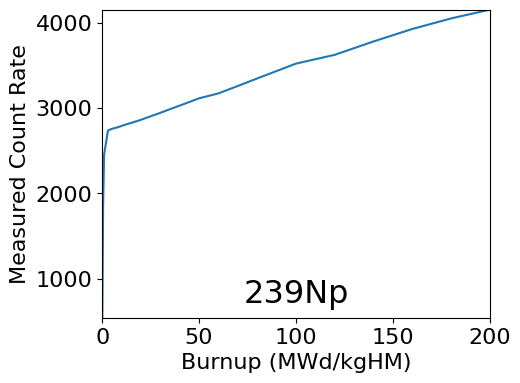

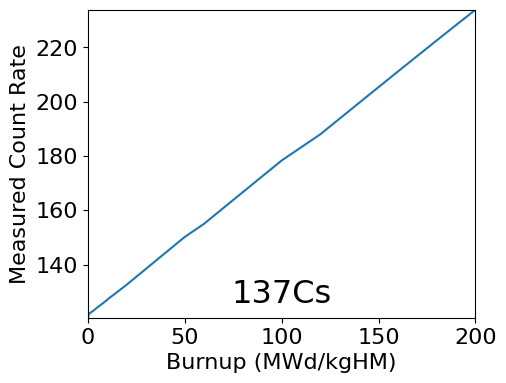

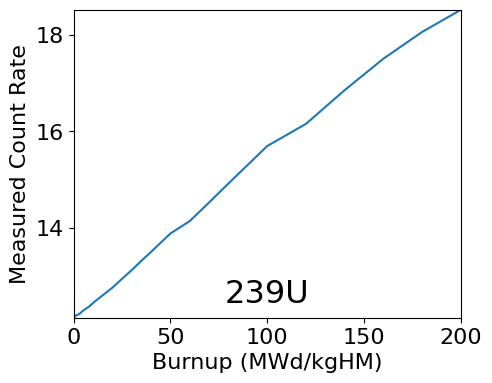

In [121]:
isotopes = ["239Np", "137Cs", "239
U"]

for iso_id in range(len(isotopes)):
    isotope = isotopes[iso_id]
    energy = gamma_energies[iso_id]
    activity = pd.DataFrame(count_data)[isotope]
    plt.figure(figsize=(5,4))
    plt.plot(burnup_vals, activity)
    plt.xlabel("Burnup (MWd/kgHM)")
    plt.ylabel(r"Measured Count Rate")
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    max_val = max(activity)
    min_val = activity[1]
    plt.ylim(min_val, max_val )
    plt.xlim(0, 200)
    plt.text(100, min_val + (max_val-min_val)*0.075, isotope, ha="center", va="center", fontsize="x-large")
    plt.show()



In [98]:

gamma_energies = [106.1230, 661.6568, 74.664]
single_gamma_dataframes = [ [], [], [] ]

for gspec_df in emissions_data:
    for iso_id in range(3):
        isotope = isotopes[iso_id]
        energy = gamma_energies[iso_id]
        matching_gamma_df = gspec_df[ (gspec_df["isotope"] == isotope) & 
            (np.isclose(gspec_df["energy"], energy)) ] 
        if len(matching_gamma_df) > 0:
            single_gamma_dataframes[iso_id] += [matching_gamma_df]
        else:
            single_gamma_dataframes[iso_id] += [pd.DataFrame({"intensity": 0.0, "energy":energy, "isotope": isotope}, index=[0])]

mean_results = {}

for iso_id in range(3):
    mean_results[isotopes[iso_id]] = np.format_float_scientific(pd.concat(single_gamma_dataframes[iso_id])["intensity"].mean(), 3)

In [78]:
for iso_id in range(3):
        isotope = isotopes[iso_id]

In [79]:
single_gamma_dataframes[iso_id]

[   intensity  energy isotope
 0        0.0  74.664   U-239,
    energy     intensity isotope
 0  74.664  7.270186e+14   U-239,
     energy     intensity isotope
 53  74.664  7.277812e+14   U-239,
     energy     intensity isotope
 53  74.664  7.295376e+14   U-239,
     energy     intensity isotope
 53  74.664  7.315745e+14   U-239,
     energy     intensity isotope
 53  74.664  7.360566e+14   U-239,
     energy     intensity isotope
 53  74.664  7.408684e+14   U-239,
     energy     intensity isotope
 53  74.664  7.473037e+14   U-239,
     energy     intensity isotope
 53  74.664  7.547624e+14   U-239,
     energy     intensity isotope
 53  74.664  7.643072e+14   U-239,
     energy     intensity isotope
 53  74.664  7.753477e+14   U-239,
     energy     intensity isotope
 53  74.664  7.861668e+14   U-239,
     energy     intensity isotope
 53  74.664  7.977731e+14   U-239,
     energy     intensity isotope
 53  74.664  8.088628e+14   U-239,
     energy     intensity isotope
 53  74.66

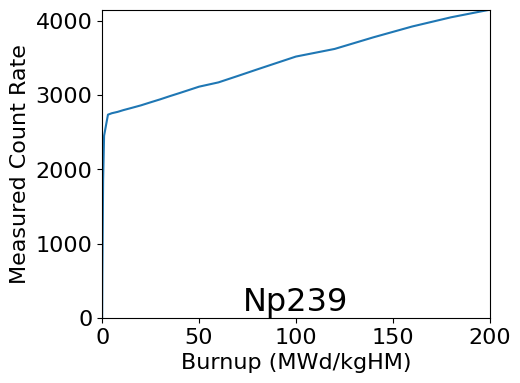

KeyError: 'Ba137m'

In [58]:
activity

,energy,intensity,isotope
0,74.664,7.270186e+14,U-239
53,74.664,7.277812e+14,U-239
53,74.664,7.295376e+14,U-239
53,74.664,7.315745e+14,U-239
53,74.664,7.360566e+14,U-239
53,74.664,7.408684e+14,U-239
53,74.664,7.473037e+14,U-239
53,74.664,7.547624e+14,U-239
53,74.664,7.643072e+14,U-239
53,74.664,7.753477e+14,U-239


In [210]:
features_to_use = ["61.46-Np239","88.97-Eu156","16.521-Zr95", "34.72-La140", "activity"]

for target_label in training_history.columns:
    rfr_model = RandomForestRegressor(random_state=0)
    rfr_model.set_params(**best_params)
    rfr_model.fit(training_gammas[features_to_use], training_history[target_label])
    rfr_model_test_score = rfr_model.score(testing_gammas[features_to_use], testing_history[target_label])
    #conc_rfr_accuracy[target_label] = rfr_model_test_score
    print(f"{target_label} rfr score: {round(rfr_model_test_score,4)}\n\n")
    #print(feature_labels[indices])
    


avg_r_dist rfr score: 0.8211


passes rfr score: 0.9916


residence_time rfr score: 0.9919


burnup rfr score: 0.9943


fima rfr score: 0.9943


pass_residence_time rfr score: 1.0


pass_avg_r_dist rfr score: 0.913


pass_fima rfr score: 0.9927


pass_burnup rfr score: 0.9922


integrated_flux_pebbles_thermal rfr score: 0.9896


integrated_flux_pebbles_fast rfr score: 0.9814


integrated_power_pebbles rfr score: 0.9943


pass_integrated_flux_pebbles_thermal rfr score: 0.8247


pass_integrated_flux_pebbles_fast rfr score: 0.9326


pass_integrated_power_pebbles rfr score: 0.9922




In [221]:
features_to_use = ["61.46-Np239","88.97-Eu156","16.521-Zr95", "activity"]

for target_label in training_history.columns:
    rfr_model = RandomForestRegressor(random_state=0)
    rfr_model.set_params(**best_params)
    rfr_model.fit(training_gammas[features_to_use], training_history[target_label])
    rfr_model_test_score = rfr_model.score(testing_gammas[features_to_use], testing_history[target_label])
    #conc_rfr_accuracy[target_label] = rfr_model_test_score
    print(f"{target_label} rfr score: {round(rfr_model_test_score,4)}\n\n")
    #print(feature_labels[indices])
    


avg_r_dist rfr score: 0.8093


passes rfr score: 0.9913


residence_time rfr score: 0.9916


burnup rfr score: 0.9934


fima rfr score: 0.9935





KeyboardInterrupt



# Misc Plotting and Tables

In [21]:
conc_table_named = rename_ZAI_columns(conc_df).T

In [22]:

new_indices = {"15.0": "15 MWd/kgHM", "100.0":"100 MWd/kgHM", "200.0": "200 MWd/kgHM"}
conc_table_named = conc_table_named.rename(columns=new_indices, errors="ignore")
conc_table_named = conc_table_named.loc[:, (conc_table_named > 1e-30).any(axis=0)]

In [24]:
conc_table_final = conc_table_named[list(new_indices.values())]
conc_table_final.to_csv("conc_table_15_100_200.csv",float_format="{:.5e}".format)

# Old Code before PBR rework

In [ ]:
do_legend = False


target_count_list = []
noise_count_list = []

hpge_fwhm = 2
hpge_lower = 661.6569 - hpge_fwhm*1.5
hpge_higher = 661.6569 + hpge_fwhm*1.5

for bu_step in range(len(gspec_df_list)):
    gspec_df_filtered = gspec_df_list[bu_step].copy()
    gspec_df_filtered = gspec_df_filtered[ (lower_bound < gspec_df_filtered["energy"]) &  (gspec_df_filtered["energy"] < upper_bound)]
    gspec_df_filtered["efficiency"] = np.interp(gspec_df_filtered["energy"], filter_data["energy"], filter_data["counts"], left=0, right=0)
    gspec_df_filtered = gspec_df_filtered.sort_values("energy")
    gspec_df_filtered["avg_countrate"] = gspec_df_filtered["intensity"]*absolute_efficiency*gspec_df_filtered["efficiency"]

    target_index = (gspec_df_filtered["isotope"] == nuclide) & (np.abs(energy_center - gspec_df_filtered["energy"]) < 0.001) 
    target_counts = gspec_df_filtered["avg_countrate"].loc[target_index].sum()


    if do_hpge_lines:
        noise_index = (~target_index) & (hpge_lower < gspec_df_filtered["energy"]) & (gspec_df_filtered["energy"] < hpge_higher)
        noise_counts = gspec_df_filtered["avg_countrate"].loc[noise_index].sum()
    else:
        noise_counts = gspec_df_filtered["avg_countrate"].loc[~target_index].sum()
    
    target_count_list += [target_counts]
    noise_count_list += [noise_counts]

    abs_weighted = absolute_efficiency*gspec_df_filtered["intensity"]
    filter_weighted = abs_weighted*gspec_df_filtered["efficiency"]

    try:
        max_weighted = max(abs_weighted)
    except:
        max_weighted = 0
    fig, ax = plt.subplots(figsize=(6,3.5) )
    plt.plot(filter_data["energy"], filter_data["counts"]*max_weighted , color="gray", linestyle="dashed", label="Filter")
    plt.vlines(gspec_df_filtered["energy"], 1e-11, abs_weighted, linestyle="dotted", color="red", label="Emitted")
    plt.vlines(gspec_df_filtered["energy"], 0, filter_weighted, label="Measured")

    
    plt.vlines(energy_center, 0, target_counts, color="#0097ff", linewidth=2, zorder=10)

    if do_hpge_lines:
        plt.vlines([hpge_lower, hpge_higher], 0, plot_max, linestyle="dashdot", color="green", label=r"1.5$\times$"+"HPGe\nFWHM")
    
    plt.xlim(lower_plot_bound, upper_plot_bound)
    plt.ylim(1, plot_max)
    plt.xlabel("Energy (keV)")
    plt.ylabel("Average Count Rate")
    plt.yscale("log")
    plt.tight_layout()
    bu_str = f"{burnup_vals[bu_step]} MWd/kgHM"+"\n"+crystal_label
    plt.text(0.03, 0.95, bu_str, ha='left', verticalalignment='top', transform = ax.transAxes)
    if do_legend:
        plt.legend(loc="upper right")
        plt.savefig(f"figures/filtered_spectra_plots/filtered_spectrum_{details}_bu{bu_step}_legend.png")
    else:
        plt.savefig(f"figures/filtered_spectra_plots/filtered_spectrum_{details}_bu{bu_step}.png")
    plt.show()
count_dict_key = str(round(energy_center)) + "keV_"+details
count_dict[count_dict_key] = {}
count_dict[count_dict_key]["target"] = np.array(target_count_list)
count_dict[count_dict_key]["noise"] = np.array(noise_count_list)

signal_to_noise_ratios = np.array(target_count_list)[1:]/np.array(noise_count_list)[1:]
median_ratio = np.median(signal_to_noise_ratios)

if median_ratio > 1:
    median_ratio = round(median_ratio,1)
else:
    median_ratio = round(median_ratio,3)

fig, ax = plt.subplots(figsize=(6,3.5) )
plt.plot(burnup_vals, target_count_list, label=f"{nuclide} Counts")
plt.plot(burnup_vals, noise_count_list, color="orange", linestyle="dashed", label="Interfering Counts")
crystal_str = f"{crystal_label}"
if do_hpge_lines:
    plt.text(0.1, 0.88, crystal_str, ha='left', verticalalignment='top', transform = ax.transAxes)
else:
    plt.text(0.03, 0.95, crystal_str, ha='left', verticalalignment='top', transform = ax.transAxes)
    

median_str = f"Median SNR: {median_ratio}"
plt.text(0.97, 0.10, median_str, ha='right', verticalalignment='bottom', transform = ax.transAxes)

plt.xlabel("Burnup (MWd/kgHM)")
plt.ylabel("Average Count Rate")
plt.legend()
plt.tight_layout()
plt.savefig(f"figures/signal_vs_noise/{details}_SNR.png")
plt.show()